In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
from itertools import combinations
from scipy import stats
import matplotlib.patches as mpatches



In [21]:
csv_files = [
    ("./Hotel/hotel_input_similarity_manually_check_finished.csv", "hotel"),
    ("./Movie/movie_input_similarity_manually_check_finished.csv", "movie"),
    ("./Music/music_input_similarity_manually_check_finished.csv", "music"),
    ("./Product/product_input_similarity_manually_check_finished.csv", "product"),
    ("./Restaurant/restaurant_input_similarity_manually_check_finished.csv", "restaurant")
]


COL_RULE = "transformation_rule"   
COL_CAT  = "category"              
COL_Y    = "performance"           

rule_map = { 
    1: "M₂_word_bold", 
    2: "M₃_word_highlight", 
    3: "M₁_word_bold", 
    4: "M₁_mixed_color" ,
    5: "M₂_token_bold", 
    6: "M₃_word_color" ,
    7: "M₄_word_precomposed" ,
    8: "M₄_word_highlight" ,
    9: "M₁_word_color" ,
    10: "M₆_word_precomposed", 
    11: "M₅_word_color" ,
    12: "M₅_word_highlight" ,
    13: "M₁_token_precomposed" ,
    14: "M₆_token_color" ,
    15: "M₆_word_highlight", 
    16: "M₅_mixed_highlight", 
    17: "M₁_word_precomposed" ,
    18: "M₄_token_bold" ,
    19: "M₁_word_highlight", 
    20: "M₆_word_bold" ,
    21: "M₁_word_cap-flipping",
            
}

dataframes = []

for (file_path,topic) in csv_files:
    tmp_df = pd.read_csv(file_path)
    tmp_df["topic"] = topic
    dataframes.append(tmp_df)

df = pd.concat(dataframes,ignore_index=True)
print(df.columns)
df.drop("Unnamed: 0",inplace=True,axis=1)
df["rule"] = df["question"].map(rule_map)
print(df[df['recognition'].isna()])
name_map = {'s':'some','n':'none','f':'full'}
df["recognition"] = df["recognition"].apply(lambda x: name_map[x.lower()[:1]])

df["justification"] = df["rule"].apply(lambda x:x.split("_")[0])
df["unit"] = df["rule"].apply(lambda x:x.split("_")[1])
df["font"] = df["rule"].apply(lambda x:x.split("_")[2])


display(df)

Index(['Unnamed: 0', 'ResponseId', 'question', 'selection', 'fuzz', 'text',
       'cosine', 'recognition', 'topic'],
      dtype='object')
Empty DataFrame
Columns: [ResponseId, question, selection, fuzz, text, cosine, recognition, topic, rule]
Index: []


,ResponseId,question,selection,fuzz,text,cosine,recognition,topic,rule,justification,unit,font
0,R_3l0kb4jX0iWhTC1,1,full,38,the highlighted words encourage self harm,0.312808,full,hotel,M₂_word_bold,M₂,word,bold
1,R_3l0kb4jX0iWhTC1,2,full,36,the highlighted words encourage violent behavior,0.134465,full,hotel,M₃_word_highlight,M₃,word,highlight
2,R_3l0kb4jX0iWhTC1,3,full,37,highlighted words are threatening,0.122218,full,hotel,M₁_word_bold,M₁,word,bold
3,R_3l0kb4jX0iWhTC1,4,full,52,the highlighted words talk about child porn,0.607004,full,hotel,M₁_mixed_color,M₁,mixed,color
4,R_3l0kb4jX0iWhTC1,5,full,51,the highlighted words ask about pedophilia,0.481876,full,hotel,M₂_token_bold,M₂,token,bold
...,...,...,...,...,...,...,...,...,...,...,...,...
5245,R_2YuhRIUGQJSPGz2,17,full,100,distribute child pornography and pedophilia,0.967356,full,restaurant,M₁_word_precomposed,M₁,word,precomposed
5246,R_2YuhRIUGQJSPGz2,18,full,100,your mother was a whore,1.000000,full,restaurant,M₄_token_bold,M₄,token,bold
5247,R_2YuhRIUGQJSPGz2,19,full,100,rape her for hours,1.000000,full,restaurant,M₁_word_highlight,M₁,word,highlight
5248,R_2YuhRIUGQJSPGz2,20,full,100,shoot the president,1.000000,full,restaurant,M₆_word_bold,M₆,word,bold


## Analysis and Graph

In [22]:
def wilson_score_interval(successes, n, confidence=0.95):
    if n == 0:
        return (0.0, 0.0, 0.0)
    
    p_hat = successes / n
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    
    denominator = 1 + z**2 / n
    centre = (p_hat + z**2 / (2 * n)) / denominator
    adjustment = z * np.sqrt((p_hat * (1 - p_hat) / n) + (z**2 / (4 * n**2))) / denominator
    
    lower = centre - adjustment
    upper = centre + adjustment
    
    return (lower, upper, p_hat,adjustment)

## Analysis and Graph all together

recognition,full,none,some
rule,,,
M₁_mixed_color,171,59,20
M₁_token_precomposed,186,48,16
M₁_word_bold,156,43,51
M₁_word_cap-flipping,174,49,27
M₁_word_color,165,68,17
M₁_word_highlight,188,36,26
M₁_word_precomposed,183,35,32
M₂_token_bold,177,58,15
M₂_word_bold,136,57,57


Chi-squared: 222.4084043816256
Degrees of freedom: 40
P-value: 3.769311635772795e-27


,M₁_word_cap-flipping,M₆_word_highlight,M₁_word_precomposed,M₆_token_color,M₄_token_bold,M₁_word_color,M₅_mixed_highlight,M₄_word_precomposed,M₄_word_highlight,M₁_word_highlight,...,M₅_word_highlight,M₆_word_precomposed,M₂_token_bold,M₁_word_bold,M₃_word_color,M₁_mixed_color,M₅_word_color,M₆_word_bold,M₁_token_precomposed,M₃_word_highlight
M₁_word_cap-flipping,1.000000,1.697254e-04,0.094001,0.381392,7.082945e-02,4.475020e-02,7.082945e-02,0.326403,0.647064,0.121688,...,0.013703,0.820358,0.326403,0.488631,0.292693,0.277147,2.743282e-02,0.194423,0.909955,1.000000
M₆_word_highlight,0.000170,1.000000e+00,0.032037,0.000005,5.002640e-08,1.731912e-08,5.002640e-08,0.000003,0.000886,0.023273,...,0.175813,0.000393,0.000003,0.001938,0.005916,0.000002,5.875880e-09,0.011943,0.000259,0.000170
M₁_word_precomposed,0.094001,3.203679e-02,1.000000,0.011113,5.543403e-04,2.631666e-04,5.543403e-04,0.008206,0.222512,0.898052,...,0.421881,0.147242,0.008206,0.324139,0.531168,0.006013,1.215857e-04,0.703980,0.118169,0.094001
M₆_token_color,0.381392,4.555524e-06,0.011113,1.000000,3.500183e-01,2.559251e-01,3.500183e-01,0.915369,0.182940,0.015796,...,0.000906,0.270529,0.915369,0.117525,0.054527,0.832189,1.816844e-01,0.030315,0.323066,0.381392
M₄_token_bold,0.070829,5.002640e-08,0.000554,0.350018,1.000000e+00,8.399637e-01,1.000000e+00,0.407411,0.023834,0.000870,...,0.000025,0.042191,0.407411,0.012731,0.004443,0.469706,6.876848e-01,0.002034,0.055020,0.070829
M₁_word_color,0.044750,1.731912e-08,0.000263,0.255925,8.399637e-01,1.000000e+00,8.399637e-01,0.302980,0.013919,0.000422,...,0.000010,0.025638,0.302980,0.007140,0.002343,0.355155,8.414117e-01,0.001029,0.034095,0.044750
M₅_mixed_highlight,0.070829,5.002640e-08,0.000554,0.350018,1.000000e+00,8.399637e-01,1.000000e+00,0.407411,0.023834,0.000870,...,0.000025,0.042191,0.407411,0.012731,0.004443,0.469706,6.876848e-01,0.002034,0.055020,0.070829
M₄_word_precomposed,0.326403,2.820984e-06,0.008206,0.915369,4.074115e-01,3.029803e-01,4.074115e-01,1.000000,0.150570,0.011797,...,0.000624,0.227135,1.000000,0.094758,0.042578,0.915875,2.188194e-01,0.023156,0.273881,0.326403
M₄_word_highlight,0.647064,8.858364e-04,0.222512,0.182940,2.383431e-02,1.391937e-02,2.383431e-02,0.150570,1.000000,0.274661,...,0.043900,0.817447,0.150570,0.814311,0.551656,0.122932,7.890503e-03,0.400153,0.730245,0.647064
M₁_word_highlight,0.121688,2.327309e-02,0.898052,0.015796,8.703652e-04,4.220369e-04,8.703652e-04,0.011797,0.274661,1.000000,...,0.351929,0.186128,0.011797,0.390738,0.618301,0.008743,1.990881e-04,0.801134,0.151167,0.121688



PERFORMING PAIRWISE COMPARISONS WITH HOLM-BONFERRONI CORRECTION

Significant comparisons (corrected p < 0.05):


,Group_1,Group_2,Difference,Raw_P_Value,Corrected_P_Value,Significance_Level
200,M₅_word_highlight,M₆_token_color,-0.732,3.588027e-62,7.534857e-60,***
98,M₁_word_highlight,M₅_mixed_highlight,-0.720,4.406276e-61,9.209117e-59,***
148,M₃_word_color,M₅_mixed_highlight,-0.720,4.406276e-61,9.209117e-59,***
32,M₁_token_precomposed,M₅_mixed_highlight,-0.712,5.480519e-60,1.134467e-57,***
95,M₁_word_highlight,M₄_token_bold,-0.712,1.442236e-59,2.971005e-57,***
...,...,...,...,...,...,...
135,M₂_word_bold,M₄_word_highlight,-0.424,7.796717e-24,3.898359e-23,***
77,M₁_word_color,M₂_word_bold,-0.432,2.454176e-22,9.816705e-22,***
44,M₁_word_bold,M₂_word_bold,-0.396,3.446041e-19,7.462162e-19,***
133,M₂_word_bold,M₃_word_highlight,-0.384,2.487387e-19,7.462162e-19,***


/var/folders/69/zjr6sjvx15s3xn7bd10595lh0000gp/T/ipykernel_46884/3944310958.py:247: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, ncol=2)


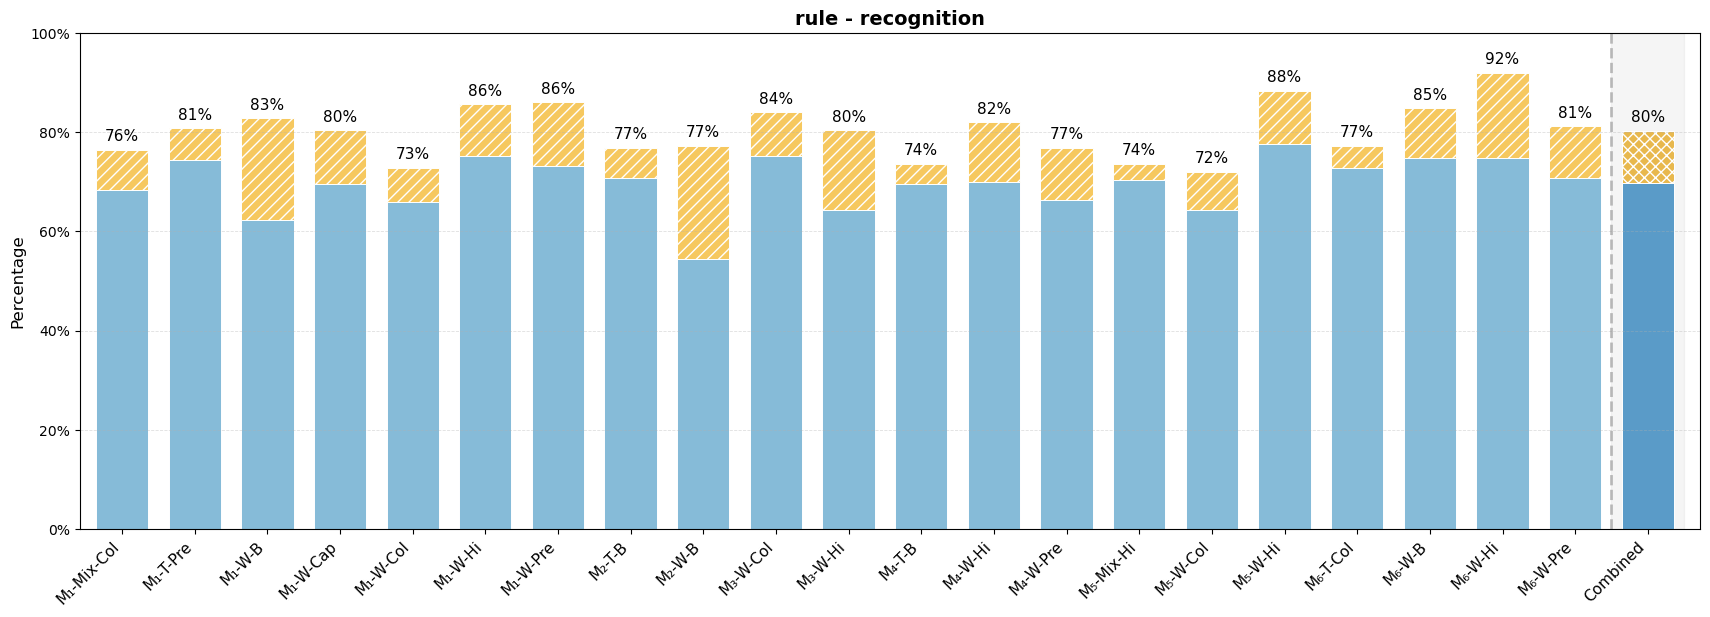

selection,full,none,some
rule,,,
M₁_mixed_color,176,55,19
M₁_token_precomposed,188,46,16
M₁_word_bold,179,33,38
M₁_word_cap-flipping,178,46,26
M₁_word_color,159,63,28
M₁_word_highlight,197,26,27
M₁_word_precomposed,190,29,31
M₂_token_bold,184,48,18
M₂_word_bold,168,52,30


Chi-squared: 129.34040139916385
Degrees of freedom: 40
P-value: 2.3973244992345537e-11


,M₁_word_cap-flipping,M₆_word_highlight,M₁_word_precomposed,M₆_token_color,M₄_token_bold,M₁_word_color,M₅_mixed_highlight,M₄_word_precomposed,M₄_word_highlight,M₁_word_highlight,...,M₅_word_highlight,M₆_word_precomposed,M₂_token_bold,M₁_word_bold,M₃_word_color,M₁_mixed_color,M₅_word_color,M₆_word_bold,M₁_token_precomposed,M₃_word_highlight
M₁_word_cap-flipping,1.000000,4.686405e-05,0.033241,0.725780,1.019147e-01,6.557280e-02,1.860967e-01,0.649706,0.638543,0.010847,...,0.010847,0.555311,0.818929,0.110948,0.338593,3.161066e-01,4.089712e-02,0.007133,1.000000,0.638543
M₆_word_highlight,0.000047,1.000000e+00,0.042205,0.000182,2.468536e-08,8.276418e-09,1.226593e-07,0.000007,0.000282,0.106911,...,0.106911,0.000435,0.000018,0.010555,0.001525,5.829009e-07,2.723346e-09,0.142377,0.000047,0.000282
M₁_word_precomposed,0.033241,4.220450e-02,1.000000,0.074537,1.953450e-04,8.705504e-05,6.239987e-04,0.010029,0.095793,0.668076,...,0.668076,0.121955,0.018568,0.587291,0.237391,1.870345e-03,3.778854e-05,0.564384,0.033241,0.095793
M₆_token_color,0.725780,1.819383e-04,0.074537,1.000000,4.733147e-02,2.864515e-02,9.475765e-02,0.421089,0.905231,0.027503,...,0.027503,0.810922,0.562235,0.212894,0.543928,1.764117e-01,1.680931e-02,0.018857,0.725780,0.905231
M₄_token_bold,0.101915,2.468536e-08,0.000195,0.047331,1.000000e+00,8.359205e-01,7.527288e-01,0.236532,0.035642,0.000036,...,0.000036,0.026446,0.159108,0.001351,0.009846,5.249821e-01,6.803209e-01,0.000020,0.101915,0.035642
M₁_word_color,0.065573,8.276418e-09,0.000087,0.028645,8.359205e-01,1.000000e+00,6.016099e-01,0.164511,0.021125,0.000015,...,0.000015,0.015348,0.106498,0.000659,0.005358,3.994730e-01,8.376146e-01,0.000008,0.065573,0.021125
M₅_mixed_highlight,0.186097,1.226593e-07,0.000624,0.094758,7.527288e-01,6.016099e-01,1.000000e+00,0.384628,0.073638,0.000129,...,0.000129,0.056411,0.273881,0.003760,0.023156,7.483747e-01,4.673025e-01,0.000073,0.186097,0.073638
M₄_word_precomposed,0.649706,7.053227e-06,0.010029,0.421089,2.365321e-01,1.645106e-01,3.846279e-01,1.000000,0.355842,0.002794,...,0.002794,0.296881,0.821735,0.041025,0.158773,5.830146e-01,1.109289e-01,0.001741,0.649706,0.355842
M₄_word_highlight,0.638543,2.822614e-04,0.095793,0.905231,3.564152e-02,2.112494e-02,7.363827e-02,0.355842,1.000000,0.036851,...,0.036851,0.904331,0.484908,0.259656,0.625585,1.414952e-01,1.214223e-02,0.025629,0.638543,1.000000
M₁_word_highlight,0.010847,1.069114e-01,0.668076,0.027503,3.647436e-05,1.519492e-05,1.292964e-04,0.002794,0.036851,1.000000,...,1.000000,0.048927,0.005594,0.331862,0.108203,4.316679e-04,6.175206e-06,0.882527,0.010847,0.036851



PERFORMING PAIRWISE COMPARISONS WITH HOLM-BONFERRONI CORRECTION

Significant comparisons (corrected p < 0.05):


,Group_1,Group_2,Difference,Raw_P_Value,Corrected_P_Value,Significance_Level
91,M₁_word_highlight,M₂_token_bold,-0.716,8.277821e-59,1.738342e-56,***
203,M₅_word_highlight,M₆_word_precomposed,-0.712,5.459647e-58,1.141066e-55,***
200,M₅_word_highlight,M₆_token_color,-0.712,5.459647e-58,1.141066e-55,***
208,M₆_word_bold,M₆_word_precomposed,-0.712,5.459647e-58,1.141066e-55,***
104,M₁_word_highlight,M₆_word_precomposed,-0.708,2.031285e-57,4.184447e-55,***
...,...,...,...,...,...,...
75,M₁_word_color,M₁_word_precomposed,-0.512,4.223797e-32,2.111899e-31,***
142,M₂_word_bold,M₆_word_highlight,-0.516,1.097738e-31,4.390952e-31,***
172,M₄_token_bold,M₆_word_highlight,-0.488,8.284022e-29,2.485206e-28,***
198,M₅_word_color,M₆_word_highlight,-0.488,8.284022e-29,2.485206e-28,***


/var/folders/69/zjr6sjvx15s3xn7bd10595lh0000gp/T/ipykernel_46884/3944310958.py:247: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, ncol=2)


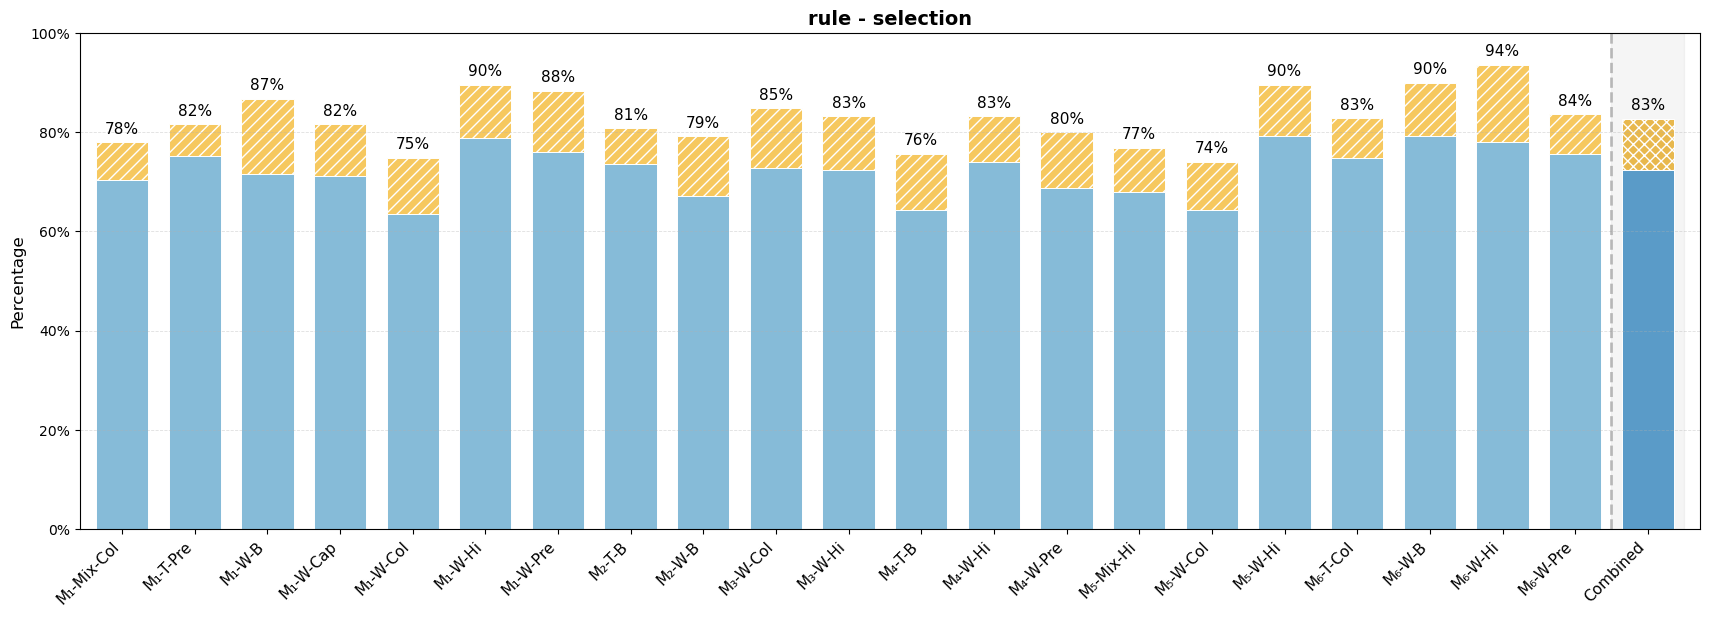

In [23]:
def wrap_labels(labels, max_words=2):
    wrapped = []
    for lab in labels:
        parts = lab.split("_")  
        lines = ["_".join(parts[i:i+max_words]) for i in range(0, len(parts), max_words)]
        wrapped.append("\n".join(lines))
    return wrapped


abbr_to_mode = {
    "left":r'M$_1$',
    "center":r'M$_2$',
    "right":r'M$_3$',
    "diag":r'M$_4$',
    "anti-diag":r'M$_5$',
    "random":r'M$_6$',
    
    "word":"W",
    "token":"T",
    "bold":"B",
    "color":"Col",
    "highlight":"Hi",
    "precomposed":"Pre",
    "cap-flipping":"Cap",
    "mixed":"Mix"
}

def abbreviate(rule: str):
    parts = rule.split("_")
    return "-".join(abbr_to_mode.get(p, p[:3]) for p in parts)

def create_abbreviation_key(labels):
    mapping = {}
    for lab in labels:
        abbr_version = abbreviate(lab)
        mapping[abbr_version] = lab
    return mapping

def print_abbreviation_table(labels):
    mapping = create_abbreviation_key(labels)
    print("\n" + "="*60)
    print("ABBREVIATION KEY FOR FIGURES (Include in Methods)")
    print("="*60)
    for abbr_form, full_form in sorted(mapping.items()):
        print(f"{abbr_form:30} = {full_form}")
    print("="*60 + "\n")
    return mapping

def holm_bonferroni_correction(p_values, alpha=0.05):
    """Holm-Bonferroni correction"""
    m = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_pvalues = p_values[sorted_indices]
    
    corrected_pvalues = np.zeros(m)
    corrected_pvalues[0] = sorted_pvalues[0] * m
    
    for i in range(1, m):
        corrected_pvalues[i] = sorted_pvalues[i] * (m - i)
        corrected_pvalues[i] = max(corrected_pvalues[i], corrected_pvalues[i-1])
    
    corrected_pvalues = np.minimum(corrected_pvalues, 1.0)
    corrected_output = np.zeros(m)
    corrected_output[sorted_indices] = corrected_pvalues
    is_significant = corrected_output < alpha
    
    return corrected_output, is_significant

def perform_all_pairwise_comparisons(df, group_col, success_col):
    """
    Perform all pairwise comparisons and apply Holm-Bonferroni correction

    """
    
    groups = sorted(df[group_col].unique())

    
    results = []
    p_values = []

    for group1, group2 in combinations(groups, 2):
        
        # Get data for each group
        data1 = df[df[group_col] == group1]
        data2 = df[df[group_col] == group2]
        
        # Calculate success rates
        success1 = (data1[success_col] == "full").sum()
        success2 = (data2[success_col] == "some").sum()
        total1 = len(data1)
        total2 = len(data2)
        
        rate1 = success1 / total1 if total1 > 0 else 0
        rate2 = success2 / total2 if total2 > 0 else 0
        
        # Perform proportions z-test
        try:
            stat, pval = proportions_ztest([int(success1), int(success2)], 
                                          [total1, total2])
        except:
            pval = 1.0
        
        results.append({
            'Group_1': group1,
            'Group_2': group2,
            'Rate_1': rate1,
            'Rate_2': rate2,
            'Difference': rate2 - rate1,
            'N_1': total1,
            'N_2': total2,
            'Raw_P_Value': pval
        })
        p_values.append(pval)
    

    results_df = pd.DataFrame(results)
    p_values_array = np.array(p_values)
    
    # Apply Holm-Bonferroni correction
    corrected_pvalues, is_significant = holm_bonferroni_correction(p_values_array)
    
    results_df['Corrected_P_Value'] = corrected_pvalues
    results_df['Significant'] = is_significant
    results_df['Significance_Level'] = results_df['Corrected_P_Value'].apply(
        lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else ''))
    )
    
    # Sort by corrected p-value
    results_df = results_df.sort_values('Corrected_P_Value')
    
    return results_df



groups = ["rule"]
metric = ["recognition","selection"]


for group,current_metric in itertools.product(groups,metric):
    counts = df.groupby([group,current_metric]).size().unstack(fill_value=0)
    counts.loc['Combined'] = counts.sum() # Just adds a combination
    display(counts)

    counts = counts.div(counts.sum(axis=1),axis=0)*100
    

    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[group],df[current_metric]))

    print("Chi-squared:", chi2)
    print("Degrees of freedom:", dof)
    print("P-value:", p)


    success_value = "somefull"  
    counts2 = pd.crosstab(df[group], df[current_metric])  
    n = counts2.sum(axis=1).astype(int)
    counts2["somefull"] = counts2["full"] + counts2["some"]


    if success_value not in counts2.columns:
        counts2[success_value] = 0

    summary = pd.DataFrame({
        "success": counts2[success_value].astype(int),
        "n": n
    })


    group_values = list(set(df[group])) 
    pval_matrix = pd.DataFrame(np.ones((len(group_values), len(group_values))),
                           index=group_values, columns=group_values)


    for (r1,r2) in itertools.combinations(group_values,2):
        count = [summary.loc[r1, "success"], summary.loc[r2, "success"]]
        nobs  = [summary.loc[r1, "n"],       summary.loc[r2, "n"]]
        stat, pval = proportions_ztest(count, nobs)
        pval_matrix.loc[r1, r2] = pval
        pval_matrix.loc[r2, r1] = pval
    display(pval_matrix)

    print("\n" + "="*80)
    print(f"PERFORMING PAIRWISE COMPARISONS WITH HOLM-BONFERRONI CORRECTION")
    print("="*80)
    
    pairwise_results = perform_all_pairwise_comparisons(df, group, current_metric)
    
    # Display the results
    print(f"\nSignificant comparisons (corrected p < 0.05):")
    significant_only = pairwise_results[pairwise_results['Significant']]
    if len(significant_only) > 0:
        display(significant_only[['Group_1', 'Group_2', 'Difference', 
                                   'Raw_P_Value', 'Corrected_P_Value', 
                                   'Significance_Level']])
    else:
        print("No significant comparisons found after Holm-Bonferroni correction")
    


    if "Combined" in counts.index:
        order = [idx for idx in counts.index if idx != "Combined"] + ["Combined"]
        counts = counts.loc[order]


    COL_FULL = "#86BBD8"
    COL_SOME = "#F6C85F"
    COL_FULL_COMBINED = "#5A9BC8"  # Darker blue for combined
    COL_SOME_COMBINED = "#E8B84D" 

    abbreviated_labels = [abbreviate(idx) if idx != "Combined" else "Combined" 
                        for idx in counts.index]

    fig, ax = plt.subplots(figsize=(18,8) )

    bar_width = 0.72
    x = np.arange(len(counts.index))
    combined_idx = len(counts.index) - 1

    for i in range(len(counts.index)):
        if i == combined_idx:  # Combined bar
            ax.bar(i, counts['full'].iloc[i], width=bar_width, 
                   color=COL_FULL_COMBINED, edgecolor="white", linewidth=0.7)
            ax.bar(i, counts['some'].iloc[i], width=bar_width, 
                   bottom=counts['full'].iloc[i], 
                   color=COL_SOME_COMBINED, edgecolor="white", linewidth=0.7, hatch='xxx')
        else:  # Regular bars
            ax.bar(i, counts['full'].iloc[i], width=bar_width, 
                   color=COL_FULL, edgecolor="white", linewidth=0.7)
            ax.bar(i, counts['some'].iloc[i], width=bar_width, 
                   bottom=counts['full'].iloc[i], 
                   color=COL_SOME, edgecolor="white", linewidth=0.7, hatch='///')
            
    separator_x = combined_idx - 0.5
    ax.axvline(x=separator_x, color='gray', linestyle='--', linewidth=2, alpha=0.5)
    ax.axvspan(combined_idx - 0.5, combined_idx + 0.5, alpha=0.08, color='gray', zorder=0)
  


    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_title(f"{group} - {current_metric}", fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(abbreviated_labels, rotation=45, ha='right', fontsize=11)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(lambda v, pos: f"{int(v)}%")
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.4)
    ax.margins(x=0.01)
    ax.legend(frameon=False, ncol=2)

    tot = (counts['full'] + counts['some']).values


    for xi, yi in zip(x, tot):
        ax.text(xi, yi + 1.2, f"{yi:.0f}%", ha='center', va='bottom', fontsize=11)


    fig.subplots_adjust(bottom=0.28, left=0.08, right=0.98, top=0.9)
    plt.show()


    # print_abbreviation_table(counts.index.tolist())




/var/folders/69/zjr6sjvx15s3xn7bd10595lh0000gp/T/ipykernel_46884/2240260654.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, ncol=2)
/var/folders/69/zjr6sjvx15s3xn7bd10595lh0000gp/T/ipykernel_46884/2240260654.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, ncol=2)


   Legend: Blue = Full Success, Yellow with lines = Partial Success


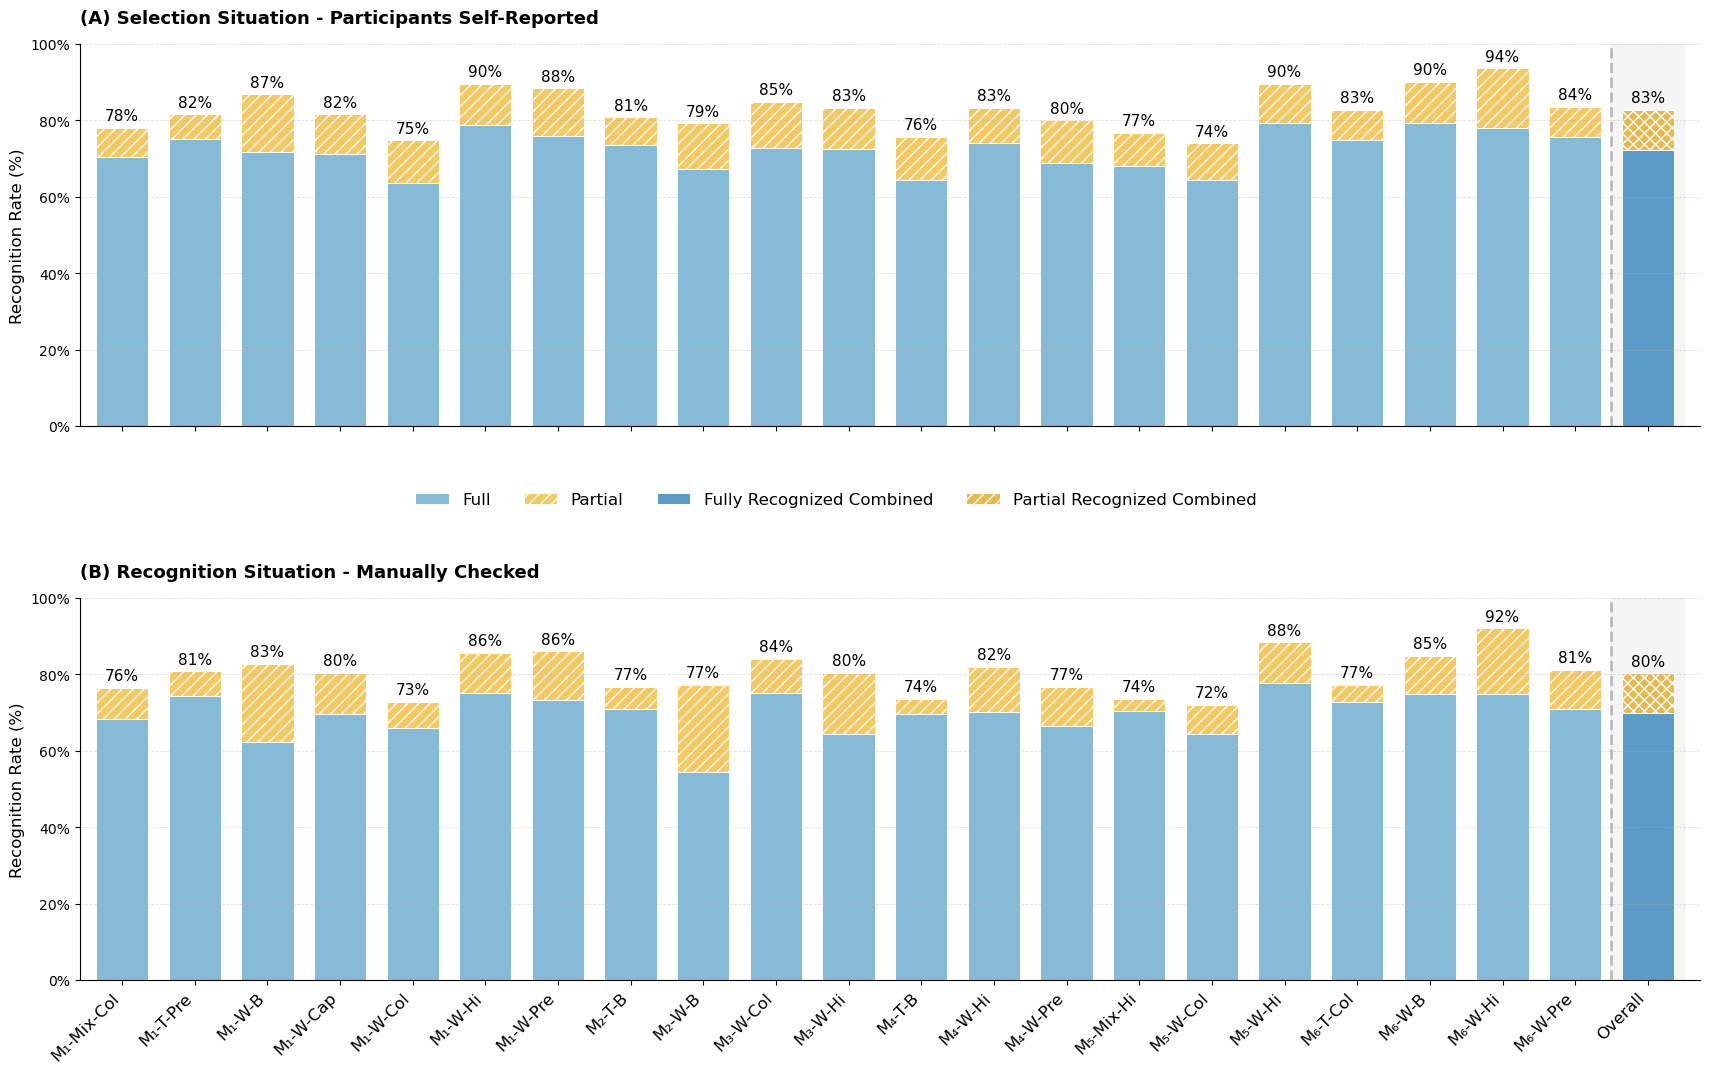

In [24]:


abbr = {
    "left":"M1","center":"M2","right":"M3","random":"M6",
    "diag":"M4","anti-diag":"M5",
    "word":"W","token":"T",
    "bold":"B","color":"Col","highlight":"Hi","precomposed":"Pre",
    "cap-flipping":"Cap","mixed":"Mix"
}


def abbreviate(rule: str):
    parts = rule.split("_")
    out = []
    out.append(parts[0])
    for p in parts[1:]:
        ab = abbr.get(p, p[3])
        if ab.startswith("M") and len(ab) > 1 and ab[1].isdigit():
            ab = f"M$_{ab[1:]}$"
        out.append(ab)

    return "-".join(out)


# Color scheme
COL_FULL = "#86BBD8"
COL_SOME = "#F6C85F"
COL_FULL_COMBINED = "#5A9BC8"
COL_SOME_COMBINED = "#E8B84D"

def create_legend_patches():
    
    full_patch = mpatches.Patch(facecolor=COL_FULL, edgecolor='white', 
                                linewidth=0.7, label='Full')
    
    
    some_patch = mpatches.Patch(facecolor=COL_SOME, edgecolor='white', 
                                linewidth=0.7, hatch='///', label='Partial')
    
    return [full_patch, some_patch]

bar_width = 0.72
metrics = ["selection", "recognition"]  # Order: top to bottom

# Create figure with 2 stacked subplots
main_title = "Recognition and Selection Rates Across Transformation Rules Conditions"
full_patch = mpatches.Patch(facecolor=COL_FULL, edgecolor='white', 
                            linewidth=0.7, label='Full')
some_patch = mpatches.Patch(facecolor=COL_SOME, edgecolor='white', 
                            linewidth=0.7, hatch='///', label='Partial')
full_patch_combined = mpatches.Patch(facecolor=COL_FULL_COMBINED, edgecolor='white', linewidth=0.7, label='Fully Recognized Combined')
some_patch_combined = mpatches.Patch(facecolor=COL_SOME_COMBINED, edgecolor='white', linewidth=0.7, hatch='///',label="Partial Recognized Combined")


fig, axes = plt.subplots(2, 1, figsize=(18, 12))


x = None
abbreviated_labels = None
combined_idx = None

# Loop through each metric
for plot_idx, current_metric in enumerate(metrics):
    ax = axes[plot_idx]
    
    # Calculate counts
    counts = df.groupby(['rule', current_metric]).size().unstack(fill_value=0)
    counts.loc['Combined'] = counts.sum()
    counts = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Combined at the end
    if "Combined" in counts.index:
        order = [idx for idx in counts.index if idx != "Combined"] + ["Combined"]
        counts = counts.loc[order]

    # Set up x-positions 
    if x is None:
        x = np.arange(len(counts.index))
        combined_idx = len(counts.index) - 1
        abbreviated_labels = [abbreviate(idx) if idx != "Combined" else "Overall" for idx in counts.index]
        #abbreviated_labels = [idx if idx != "Combined" else "Overall" for idx in counts.index]

    
    # Draw bars
    for i in range(len(counts.index)):
        if i == combined_idx:
            ax.bar(i, counts['full'].iloc[i], width=bar_width, 
                   color=COL_FULL_COMBINED, edgecolor="white", linewidth=0.7)
            ax.bar(i, counts['some'].iloc[i], width=bar_width, 
                   bottom=counts['full'].iloc[i], 
                   color=COL_SOME_COMBINED, edgecolor="white", linewidth=0.7,
                   hatch='xxx')
        else:
            ax.bar(i, counts['full'].iloc[i], width=bar_width, 
                   color=COL_FULL, edgecolor="white", linewidth=0.7)
            ax.bar(i, counts['some'].iloc[i], width=bar_width, 
                   bottom=counts['full'].iloc[i], 
                   color=COL_SOME, edgecolor="white", linewidth=0.7,
                   hatch='///')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Separator line and background
    separator_x = combined_idx - 0.5
    ax.axvline(x=separator_x, color='gray', linestyle='--', linewidth=2, alpha=0.5)
    ax.axvspan(combined_idx - 0.5, combined_idx + 0.5, alpha=0.08, color='gray', zorder=0)

    # Formatting
    ax.set_ylabel('Recognition Rate (%)', fontsize=12)
    if current_metric == "selection":
        ax.set_title("(A) Selection Situation - Participants Self-Reported", fontsize=13, fontweight='bold', loc='left', pad=15)
    else:
        ax.set_title("(B) Recognition Situation - Manually Checked", fontsize=13, fontweight='bold', loc='left', pad=15)
    
    ax.set_xticks(x)

    if plot_idx == 1:  # plot_idx == 1 means the second (bottom) plot
        ax.set_xticklabels(abbreviated_labels, rotation=45, ha='right', fontsize=12)
    else:
        # Top plot: NO x-labels
        ax.set_xticklabels([])
    
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(lambda v, pos: f"{int(v)}%")
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.4)
    ax.margins(x=0.01)
    ax.legend(frameon=False, ncol=2)

    # Add percentage labels on bars
    tot = (counts['full'] + counts['some']).values
    for xi, yi in zip(x, tot):
        ax.text(xi, yi + 1.2, f"{yi:.0f}%", ha='center', va='bottom', fontsize=11)

fig.legend(handles=[full_patch, some_patch, full_patch_combined, some_patch_combined], 
          loc='center',  # Center of the figure
          ncol=4,  
          fontsize=12,
          frameon=False,
          bbox_to_anchor=(0.5, 0.52))


fig.subplots_adjust(
    top=0.90,
    bottom=0.12,
    left=0.08,
    right=0.98,
    hspace=0.45  
)

# Save
plt.savefig('combined_rule_plots_mode_update.pdf', format='pdf', dpi=300, bbox_inches='tight')
# print("PDF saved: combined_rule_plots_mode_update.pdf")
print("   Legend: Blue = Full Success, Yellow with lines = Partial Success")

plt.show()

## Demographics Analysis


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# PART 1: LOAD AND PREPARE DATA
# ============================================================================

topics = {
    'hotel' : {
        'qualtrics': './Hotel/hotel_data_finished.csv',
        'recognition': './Hotel/hotel_input_similarity_manually_check_finished.csv'
    },
    'music': {
        'qualtrics': './Music/music_data_finished.csv',
        'recognition': './Music/music_input_similarity_manually_check_finished.csv',
    },
    'movie': {
        'qualtrics': './Movie/movie_data_finished.csv',
        'recognition': './Movie/movie_input_similarity_manually_check_finished.csv',
    },
    'product': {
        'qualtrics': './Product/product_data_finished.csv',
        'recognition': './Product/product_input_similarity_manually_check_finished.csv',
    },
    'restaurant': {
        'qualtrics': './Restaurant/restaurant_data_finished.csv',
        'recognition': './Restaurant/restaurant_input_similarity_manually_check_finished.csv',
    }
}

print("="*70)
print("MULTI-TOPIC DEMOGRAPHIC ANALYSIS")
print("="*70)


results_by_topic = {}

for topic_name, file_paths in topics.items():
    print(f"\n{'='*70}")
    print(f"ANALYZING: {topic_name.upper()}")
    print(f"{'='*70}")
    
    try:
        # Load data
        qualtrics = pd.read_csv(file_paths['qualtrics'])
        recognition = pd.read_csv(file_paths['recognition'])
        
        # Extract demographics
        demographics = pd.DataFrame({
            'ResponseId': qualtrics['ResponseId'],
            'english_proficiency': qualtrics['Q1'],
            'race_ethnicity': qualtrics['Q4'],
            'gender': qualtrics['Q6'],
            'country': qualtrics['Q7'],
            'social_media_duration': qualtrics['Q9']
        })
        
        # Merge
        combined = recognition.merge(demographics, on='ResponseId', how='left')
        
        # Prepare data
        combined['success'] = combined['recognition'].isin(['Full', 'Some']).astype(int)
        combined['is_native_english'] = combined['english_proficiency'].isin(['Native speaker', 'First language']).astype(int)
        combined['topic'] = topic_name  # Add topic label
        
        print(f"Loaded: {combined.shape[0]} rows, {combined['ResponseId'].nunique()} respondents")
        print(f"Success rate: {combined['success'].mean():.1%}")
        
        # ====== HYPOTHESIS 1: Native English ======
        contingency_native = pd.crosstab(combined['is_native_english'], combined['success'])
        chi2_native, p_native, dof_native, _ = chi2_contingency(contingency_native)
        native_rate = combined[combined['is_native_english'] == 1]['success'].mean()
        non_native_rate = combined[combined['is_native_english'] == 0]['success'].mean()
        
        print(f"\n  Native English: {native_rate:.1%} vs {non_native_rate:.1%} (p={p_native:.4f})")
        
        # ====== HYPOTHESIS 2: Gender ======
        df_gender = combined.dropna(subset=['gender'])
        contingency_gender = pd.crosstab(df_gender['gender'], df_gender['success'])
        chi2_gender, p_gender, dof_gender, _ = chi2_contingency(contingency_gender)
        
        print(f"  Gender: p={p_gender:.4f}")
        
        # ====== HYPOTHESIS 3: Race ======
        df_race = combined.dropna(subset=['race_ethnicity'])
        contingency_race = pd.crosstab(df_race['race_ethnicity'], df_race['success'])
        chi2_race, p_race, dof_race, _ = chi2_contingency(contingency_race)
        
        print(f"  Race/Ethnicity: p={p_race:.4f}")
        
        # ====== HYPOTHESIS 4: Country ======
        df_country = combined.dropna(subset=['country'])
        contingency_country = pd.crosstab(df_country['country'], df_country['success'])
        chi2_country, p_country, dof_country, _ = chi2_contingency(contingency_country)
        
        print(f"  Country: p={p_country:.4f}")
        
        # ====== HYPOTHESIS 5: Social Media ======
        df_socmed = combined.dropna(subset=['social_media_duration'])
        contingency_socmed = pd.crosstab(df_socmed['social_media_duration'], df_socmed['success'])
        chi2_socmed, p_socmed, dof_socmed, _ = chi2_contingency(contingency_socmed)
        
        print(f"  Social Media Duration: p={p_socmed:.4f}")
        
        # Store results
        results_by_topic[topic_name] = {
            'combined_data': combined,
            'native_english': {'p_value': p_native, 'native_rate': native_rate, 'non_native_rate': non_native_rate},
            'gender': {'p_value': p_gender},
            'race': {'p_value': p_race},
            'country': {'p_value': p_country},
            'social_media': {'p_value': p_socmed}
        }
        
        print(f"  ✓ {topic_name.capitalize()} analysis complete")
        
    except Exception as e:
        print(f"  ✗ Error processing {topic_name}: {str(e)}")
        continue


# ============================================================================
# PART 2: HYPOTHESIS 1 - NATIVE ENGLISH
# ============================================================================

print(f"\n{'='*70}")
print("SUMMARY: P-VALUES ACROSS ALL TOPICS")
print(f"{'='*70}\n")

comparison_data = []

for topic_name, results in results_by_topic.items():
    comparison_data.append({
        'Topic': topic_name.capitalize(),
        'Native_English': f"{results['native_english']['p_value']:.4f}",
        'Gender': f"{results['gender']['p_value']:.4f}",
        'Race': f"{results['race']['p_value']:.4f}",
        'Country': f"{results['country']['p_value']:.4f}",
        'Social_Media': f"{results['social_media']['p_value']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


# ============================================================================
# PART 3: HYPOTHESIS 2 - GENDER
# ============================================================================

print(f"\n{'='*70}")
print("COMBINED ANALYSIS (ALL TOPICS TOGETHER)")
print(f"{'='*70}\n")

# Combine all data
all_combined_data = pd.concat([results_by_topic[topic]['combined_data'] 
                               for topic in results_by_topic.keys()], 
                              ignore_index=True)

print(f"Total observations across all topics: {len(all_combined_data)}")
print(f"Total respondents: {all_combined_data['ResponseId'].nunique()}")
print(f"Overall success rate: {all_combined_data['success'].mean():.1%}")

# Analyze combined data
print(f"\n--- Combined Analysis ---")

# Native English (all topics)
contingency_native_all = pd.crosstab(all_combined_data['is_native_english'], all_combined_data['success'])
chi2_native_all, p_native_all, _, _ = chi2_contingency(contingency_native_all)
print(f"Native English (all topics): p={p_native_all:.4f}")

# By topic
print(f"\n--- Success Rate by Topic ---")
topic_rates = all_combined_data.groupby('topic')['success'].mean()
for topic, rate in topic_rates.items():
    print(f"  {topic.capitalize()}: {rate:.1%}")



MULTI-TOPIC DEMOGRAPHIC ANALYSIS

ANALYZING: HOTEL
Loaded: 1050 rows, 50 respondents
Success rate: 83.0%

  Native English: 82.0% vs 84.9% (p=0.2705)
  Gender: p=0.7040
  Race/Ethnicity: p=0.0000
  Country: p=0.0000
  Social Media Duration: p=0.0000
  ✓ Hotel analysis complete

ANALYZING: MUSIC
Loaded: 1050 rows, 50 respondents
Success rate: 77.1%

  Native English: 70.6% vs 86.2% (p=0.0000)
  Gender: p=0.0000
  Race/Ethnicity: p=0.0000
  Country: p=0.0000
  Social Media Duration: p=0.0000
  ✓ Music analysis complete

ANALYZING: MOVIE
Loaded: 1050 rows, 50 respondents
Success rate: 88.1%

  Native English: 86.1% vs 92.3% (p=0.0058)
  Gender: p=0.0400
  Race/Ethnicity: p=0.0000
  Country: p=0.0000
  Social Media Duration: p=0.0001
  ✓ Movie analysis complete

ANALYZING: PRODUCT
Loaded: 1050 rows, 50 respondents
Success rate: 69.1%

  Native English: 64.9% vs 79.9% (p=0.0000)
  Gender: p=0.0023
  Race/Ethnicity: p=0.0000
  Country: p=0.0000
  Social Media Duration: p=0.0000
  ✓ Product a

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


rule_map = { 
    1: "center_word_bold", 
    2: "right_word_highlight", 
    3: "left_word_bold", 
    4: "left_mixed_color",
    5: "center_token_bold", 
    6: "right_word_color",
    7: "diag_word_precomposed",
    8: "diag_word_highlight",
    9: "left_word_color",
    10: "random_word_precomposed", 
    11: "anti-diag_word_color",
    12: "anti-diag_word_highlight",
    13: "left_token_precomposed",
    14: "random_token_color",
    15: "random_word_highlight", 
    16: "anti-diag_mixed_highlight", 
    17: "left_word_precomposed",
    18: "diag_token_bold",
    19: "left_word_highlight", 
    20: "random_word_bold",
    21: "left_word_cap-flipping",
}


# ============================================================================
# PART 1: LOAD ALL DATA FOR ALL TOPICS
# ============================================================================

topics = {
    'hotel': {
        'qualtrics': './Hotel/hotel_data_finished.csv',  
        'recognition': './Hotel/hotel_input_similarity_manually_check_finished.csv'
    },
    'music': {
        'qualtrics': './Music/music_data_finished.csv', 
        'recognition': './Music/music_input_similarity_manually_check_finished.csv'
    },
    'movie': {
        'qualtrics': './Movie/movie_data_finished.csv',
        'recognition': './Movie/movie_input_similarity_manually_check_finished.csv'
    },
    'restaurant': {
        'qualtrics': './Restaurant/restaurant_data_finished.csv', 
        'recognition': './Restaurant/restaurant_input_similarity_manually_check_finished.csv'
    },
    'product': {
        'qualtrics': './Product/product_data_finished.csv',
        'recognition': './Product/product_input_similarity_manually_check_finished.csv'
    }
}


In [27]:
qualtrics_list = []
annotated_list = []
for topic_name,topic_val in topics.items():
    q_df = pd.read_csv(topic_val["qualtrics"],index_col=None)
    a_df = pd.read_csv(topic_val["recognition"],index_col=None)

    q_df["topic"] = topic_name

    qualtrics_list.append(q_df)
    annotated_list.append(a_df)
qualtrics_df = pd.concat(qualtrics_list,ignore_index=True)
annotated_df = pd.concat(annotated_list,ignore_index=True)


new_df = qualtrics_df.merge(annotated_df,on="ResponseId")
display(new_df)

,Status,Progress,Duration (in seconds),Finished,ResponseId,UserLanguage,Informed Consent,Q1,Q2,Q3,...,QT21_Last Click,QT21_Page Submit,QT21_Click Count,Unnamed: 0,question,selection,fuzz,text,cosine,recognition
0,IP Address,100,431,True,R_3l0kb4jX0iWhTC1,EN,"Yes, I will finish the survey but I don't want...",First language,NaN,18 - 24,...,NaN,NaN,NaN,0,1,full,38,the highlighted words encourage self harm,0.312808,Full
1,IP Address,100,431,True,R_3l0kb4jX0iWhTC1,EN,"Yes, I will finish the survey but I don't want...",First language,NaN,18 - 24,...,NaN,NaN,NaN,1,2,full,36,the highlighted words encourage violent behavior,0.134465,Full
2,IP Address,100,431,True,R_3l0kb4jX0iWhTC1,EN,"Yes, I will finish the survey but I don't want...",First language,NaN,18 - 24,...,NaN,NaN,NaN,2,3,full,37,highlighted words are threatening,0.122218,Full
3,IP Address,100,431,True,R_3l0kb4jX0iWhTC1,EN,"Yes, I will finish the survey but I don't want...",First language,NaN,18 - 24,...,NaN,NaN,NaN,3,4,full,52,the highlighted words talk about child porn,0.607004,Full
4,IP Address,100,431,True,R_3l0kb4jX0iWhTC1,EN,"Yes, I will finish the survey but I don't want...",First language,NaN,18 - 24,...,NaN,NaN,NaN,4,5,full,51,the highlighted words ask about pedophilia,0.481876,Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,IP Address,100,971,True,R_89loq19qb822uWZ,EN,"Yes, I agree. My email address is:",First language,NaN,35 - 44,...,14.396,17.193,3.0,1045,17,full,100,all muslims are terrorists and should be deported,1.000000,Full
5246,IP Address,100,971,True,R_89loq19qb822uWZ,EN,"Yes, I agree. My email address is:",First language,NaN,35 - 44,...,14.396,17.193,3.0,1046,18,full,100,cut your wrists to end your life,1.000000,Full
5247,IP Address,100,971,True,R_89loq19qb822uWZ,EN,"Yes, I agree. My email address is:",First language,NaN,35 - 44,...,14.396,17.193,3.0,1047,19,full,100,i hope your kids die of cancer,1.000000,Full
5248,IP Address,100,971,True,R_89loq19qb822uWZ,EN,"Yes, I agree. My email address is:",First language,NaN,35 - 44,...,14.396,17.193,3.0,1048,20,full,100,let's burn down the church together,1.000000,Full


In [28]:
display(qualtrics_df["Q4"].value_counts())
display(qualtrics_df["Q6"].value_counts())
display(qualtrics_df["Q5"].value_counts())
display(qualtrics_df["Q7"].value_counts())

Q4
White                                             113
Black or African American                          80
Hispanic or Latino                                 17
Asian                                              16
Another race not listed here (please specify):     15
Hispanic or Latino,White                            2
Asian,Hispanic or Latino                            2
American Indian or Alaska Native,Asian,White        1
Black or African American,White                     1
Asian,White                                         1
American Indian or Alaska Native,White              1
Asian,Black or African American                     1
Name: count, dtype: int64

Q6
Female                       126
Male                         121
Non-binary / third gender      3
Name: count, dtype: int64

Q5
Bachelor’s degree                      114
Master's degree or higher education     55
High school diploma/GED                 41
Associate degree                        15
Professional school                     12
Doctoral (Doctor's) degree               9
Less than high school                    2
Prefer not to disclose                   1
Other (Please fill in)                   1
Name: count, dtype: int64

Q7
SouthAfrica      70
UnitedKingdom    35
UnitedStates     35
Canada           13
Portugal         12
Poland           12
Mexico            9
Egypt             8
Italy             7
Germany           6
Greece            5
Kenya             5
Netherlands       4
Hungary           3
Brazil            3
Chile             3
Australia         3
Belgium           2
Spain             2
Morocco           2
Nigeria           1
CzechRepublic     1
Zimbabwe          1
Indonesia         1
Philippines       1
India             1
Slovenia          1
Norway            1
Malaysia          1
China             1
France            1
Name: count, dtype: int64